## Data Cleaning :

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (8.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


Exercise 1. Consider the following dataframe of prices:<br>
```pd.DataFrame({'price':[34.6, 35.66, 33.98, 38.67, 32.99, 32.04, 37.64, 38.22, 37.13, 38.57, 32.4, 34.98, 36.74, 32.9,32.52, 38.83, 33.9, 32.62, 38.93, 32.14, 33.09, 34.25, 34.39, 33.28, 38.13, 36.25, 38.91, 38.9, 36.85, 32.17, 32.07, 34.49, 35.7, 32.54, 37.91, 37.35, 32.05, 38.03, 0.32, 33.87, 33.16, 34.74, 32.47, 33.31, 34.54, 36.6, 36.09, 35.49, 37.51, 37.33, 37.54, 33.32, 35.09, 33.08, 38.3, 34.32, 37.01, 33.63, 36.35, 33.77, 33.74, 36.62, 36.74, 37.76, 35.58, 38.76, 36.57, 37.05, 35.33, 36.41, 35.54, 37.48, 36.22, 36.19, 36.43, 34.31, 34.85, 38.76, 38.52, 38.02, 36.67, 32.51, 321.6, 37.82,34.76, 33.55, 32.85, 32.99, 35.06]}, index = pd.date_range('2014-03-03 06:00','2014-03-06 22:00',freq='H'))```<br>
    You are informed that the lowest price over this period is 32.04, and the highest was 38.93, and the data is in UTC.  Clean the data, change the time-zone to 'Asia/Singapore', and slice out the times that are between 09:00 and 14:30 (local time).

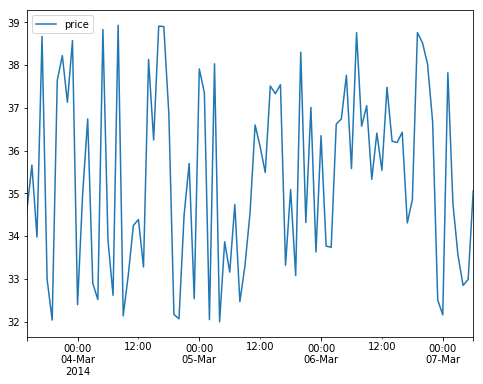

In [3]:
prices = pd.DataFrame({'price':[34.6, 35.66, 33.98, 38.67, 32.99, 32.04, 37.64, 38.22, 37.13, 38.57, 32.4, 34.98, 36.74, 32.9,32.52, 38.83, 33.9, 32.62, 38.93, 32.14, 33.09, 34.25, 34.39, 33.28, 38.13, 36.25, 38.91, 38.9, 36.85, 32.17, 32.07, 34.49, 35.7, 32.54, 37.91, 37.35, 32.05, 38.03, 0.32, 33.87, 33.16, 34.74, 32.47, 33.31, 34.54, 36.6, 36.09, 35.49, 37.51, 37.33, 37.54, 33.32, 35.09, 33.08, 38.3, 34.32, 37.01, 33.63, 36.35, 33.77, 33.74, 36.62, 36.74, 37.76, 35.58, 38.76, 36.57, 37.05, 35.33, 36.41, 35.54, 37.48, 36.22, 36.19, 36.43, 34.31, 34.85, 38.76, 38.52, 38.02, 36.67, 32.51, 321.6, 37.82,34.76, 33.55, 32.85, 32.99, 35.06]}, index = pd.date_range('2014-03-03 06:00','2014-03-06 22:00',freq='H'))
prices.describe()

# What I need to do is to fix the outliers and change the timezone and slice the hours

prices[abs(prices['price'] - prices['price'].shift(1)) > 10 ]
# or prices['increase'] = abs(prices.diff())> 10
# prices[prices['increase']]
prices.loc['2014-03-04 20:00:00'] = 32
prices.loc['2014-03-06 16:00:00'] = 32.16

prices.describe()

prices.index = prices.index.tz_localize('UTC')
prices.index = prices.index.tz_convert('Asia/Singapore')
prices.head()

prices.index = prices.index.tz_localize(None)
# The last line isn't necessary, but makes the index look nicer by removing extra marking
prices.head()

prices.between_time('09:00', '14:30')
prices.plot();

Exercise 2. Consider the following dataframe: <br>
```pd.DataFrame({'day':['2015-05-05']*32 + ['2015-05-06']*29,'time':[' 08:00:00', ' 08:30:00', ' 09:00:00', ' 09:30:00', ' 10:00:00',' 10:30:00', ' 11:00:00', ' 11:30:00', ' 12:00:00', ' 12:30:00',' 13:00:00', ' 13:30:00', ' 14:00:00', ' 14:30:00', ' 15:00:00',' 15:30:00', ' 16:00:00', ' 16:30:00', ' 17:00:00', ' 17:30:00',' 18:00:00', ' 18:30:00', ' 19:00:00', ' 19:30:00', ' 20:00:00',' 20:30:00', ' 21:00:00', ' 21:30:00', ' 22:00:00', ' 22:30:00',' 23:00:00', ' 23:30:00', ' 00:00:00', ' 00:30:00', ' 01:00:00',' 01:30:00', ' 02:00:00', ' 02:30:00', ' 03:00:00', ' 03:30:00', '04:00:00', ' 04:30:00', ' 05:00:00', ' 05:30:00', ' 06:00:00',' 06:30:00', ' 07:00:00', ' 07:30:00', ' 08:00:00', ' 08:30:00',' 09:00:00', ' 09:30:00', ' 10:00:00', ' 10:30:00', ' 11:00:00',' 11:30:00', ' 12:00:00', ' 12:30:00', ' 13:00:00', ' 13:30:00',' 14:00:00'], 'Units Manufactured':np.random.randint(10,25,size=61)})```<br>
The 'day' and 'time' columns are formatted as strings.  Create a new column which concatenates these columns into a single datetime-looking column, convert it to a column of datetime objects, and set it as the index.

In [4]:
udt = pd.DataFrame({'day':['2015-05-05']*32 + ['2015-05-06']*29,'time':[' 08:00:00', ' 08:30:00', ' 09:00:00', ' 09:30:00', ' 10:00:00',' 10:30:00', ' 11:00:00', ' 11:30:00', ' 12:00:00', ' 12:30:00',' 13:00:00', ' 13:30:00', ' 14:00:00', ' 14:30:00', ' 15:00:00',' 15:30:00', ' 16:00:00', ' 16:30:00', ' 17:00:00', ' 17:30:00',' 18:00:00', ' 18:30:00', ' 19:00:00', ' 19:30:00', ' 20:00:00',' 20:30:00', ' 21:00:00', ' 21:30:00', ' 22:00:00', ' 22:30:00',' 23:00:00', ' 23:30:00', ' 00:00:00', ' 00:30:00', ' 01:00:00',' 01:30:00', ' 02:00:00', ' 02:30:00', ' 03:00:00', ' 03:30:00', '04:00:00', ' 04:30:00', ' 05:00:00', ' 05:30:00', ' 06:00:00',' 06:30:00', ' 07:00:00', ' 07:30:00', ' 08:00:00', ' 08:30:00',' 09:00:00', ' 09:30:00', ' 10:00:00', ' 10:30:00', ' 11:00:00',' 11:30:00', ' 12:00:00', ' 12:30:00', ' 13:00:00', ' 13:30:00',' 14:00:00'], 'Units Manufactured':np.random.randint(10,25,size=61)})
udt.head()

# Convert it to a column of datetime objects, and set it as the index

udt['day time'] = (udt['day'] + udt['time'])   # concatenate these columns into a single datetime-looking column
udt['day time'] = pd.to_datetime(udt['day time'] , errors = 'coerce') # Convert it to a column of datetime objects
udt.index = udt['day time']
udt.index.names = [None]
udt = udt[['Units Manufactured']] 
udt.head()

,Units Manufactured
2015-05-05 08:00:00,16
2015-05-05 08:30:00,21
2015-05-05 09:00:00,11
2015-05-05 09:30:00,21
2015-05-05 10:00:00,15


Exercise 3. The *True Range* of a price series is defined as follows:<br>
$$ \text{TR} = \max\left[\,\left|(\text{high}-\text{low})\right|,\,\left|(\text{high}-\text{close}_\text{prev})\right|,\,\left|(\text{low}-\text{close}_\text{prev})\right|\,\right] $$
where $\text{close}_\text{prev}$ is the close of the previous time period.  Load in ```timeseries_1.csv``` again, and create a new column which is the True Range of the prices provided.

In [9]:
pr = pd.read_csv('/Users/taraahmadi/Documents/GitHub/Data-Science/timeseries_1.csv',index_col=0,parse_dates=True)

pr['hl'] = abs(pr['high'] - pr['low'])
pr['hc'] = abs(pr['high'] - (pr['close'].shift(1)))
pr['lc'] = abs(pr['low'] - (pr['close'].shift(1)))
pr['true range'] = pr[['hl' , 'hc' , 'lc']].max(axis=1)
pr = pr[['open' , 'high' , 'low' , 'close' , 'volume' , 'true range']]
pr.head()

,open,high,low,close,volume,true range
2014-02-01 08:00:00,748.1,748.2,746.7,746.8,39470,1.5
2014-02-01 08:01:00,746.9,747.1,746.8,746.8,10498,0.3
2014-02-01 08:02:00,746.8,747.2,746.7,747.1,7782,0.5
2014-02-01 08:03:00,747.2,747.8,747.1,747.6,10678,0.7
2014-02-01 08:04:00,747.5,747.8,747.5,747.8,3194,0.3


Exercise 4. Load in the included CSV ```unit_6_bonus.csv```, and combine the year, month, and day columns into a single datetime column, and apply it as the index.  The months are listed as three-letter names, not numbers.  Convert this column to the numbers corresponding with the months first.

In [8]:
bn = pd.read_csv('/Users/taraahmadi/Documents/GitHub/Data-Science/unit_6_bonus.csv')
#Convert this column M to the numbers corresponding with the months

month = {'Jan' : '01','Feb' : '02','Mar' : '03','Apr' : '04','May' : '05','Jun' : '06','Jul' : '07','Aug' : '08','Sep' : '09', 'Oct' : '10','Nov' : '11', 'Dec' : '12'}
bn['month'] = bn[['M']].replace(month)

bn['dtx'] = (bn['year'].astype(str)) +'-'+bn['month'] +'-'+(bn['day'].astype(str))
pd.to_datetime(bn['dtx'] , errors='coerce')
bn.index = bn['dtx']
bn.index.names = [None]
bn = bn[['Transactions']]
bn.head()

,Transactions
2014-06-1,58746
2014-06-8,58708
2014-06-15,58830
2014-06-22,62789
2014-06-29,59341
